![Sizing Lab](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Baniere.png)

# TD3 - Equations of sizing scenarios

*Written by Marc Budinger, INSA Toulouse, France*

We will implement here the sizing scenarios equations of the DC/DC converter.


## DC/DC converter architecture

We assume that each ultracapacity module will be connected to the main DC grid by a dedicated DC/DC converter. This converter will manage the charge and discharge of the module and adapt voltage between ultracapacitor and DC grid. 

Once the energy source (ultracapacitor here) is choosen, the remaining work concerns the sizing of the DC/DC converter. It will be the common thread for the final part of our study including ACV since sizing that will be conducted on environmental objectives.
Therefore let us present first the Product Breakdown Structure of the Watt system DC/DC converter. 

Remark: following diagrams have been developed with the [Mermaid live editor](https://mermaid.live).

![WBS](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Mermaid_WBS.svg)

The following figure illustrates the main components of this converter:
![DCDCconverter_components](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/DCDCconverter_components.png)

## Design drivers

We are going to determine here the possible reasons of the degradation in system’s components. These degration can be:
- Fast and come from transient power demands (such as permanent deformation, rupture for mechanical components);
- Gradual and come from continuous power demands which often reduce the component’s/system’s lifetime (such as mechanical fatigue/wear for mechanical components).

The component can also have imperfections which can increase the mechanical stresses on itself or other components.
For example, the inertia of an electrical motor increases the torque this same motor has to deliver or can destroy mechanical component when a sudden jam in the transmission line occurs.

We will list in following graph the possible sources of degradation of the DC/DC converter components.

![DesignDrivers](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Mermaid_DesignDrivers.svg)

> Exercise 1: Imagine and propose some sizing scenarios (use cases) that may lead to those degradation phenomena.

## Main sizing scenario

To conservatively design the equipment, we will assume that the converter must be able to continuously support the worst operating point in boost charge or discharge.

This boost charge, with an objective duration of 10 s, corresponds to the recharge of a flat path of 400 m. It is assumed that on this path the difference in height between stations is zero and that all of the kinetic energy is recovered during braking. It will also be assumed that the charges or discharges will be done at constant power. For a longer distance, we will accept a charging time longer than 10 s. 


Summary of the data needed for the calculations:
- distance between 2 totems $d$ = 400 m

- bus mass $m$ = 20 t
- [Rolling coefficient](http://en.wikipedia.org/wiki/Rolling_resistance) tires $C_{rr} = 0.01$

- DC bus voltage $U_{dc}$ = 150 V
- number of module $N_m$ = 8
- Ultracapacitor module maximum voltage $V_{max}$ = 125 V 
- Ultracapacitor module minimum voltage $V_{min}$ = 62.5 V

> Exercise 2: Explain and calculate (with python) the specifications (max power, max input/output current) of the DC/DC converter. 

In [4]:
# Parameters
U_dc=150 # [V] DC bus voltage
V_max=125. # [V] max Ultra-Capacitor voltage
V_min=62.5 # [V] min Ultra-Capacitor voltage
m=20e3 # [kg] bus mass
d=400. # [m] distance
h=3. # [m] rise height
C_rr= 0.01 # [-] tyre rolling coef
g=9.81 # [m/s²] gravity acceleration
t=10 # [s] boost charge duration
N=8 # [-] number of modules

# Energies & works calculations
E_c=m*g*C_rr*d # [J] friction work of rolling coef

print("Travel energy     : %.2g J"%(E_c))

# Power charge or discharge per module
P = E_c/t/N

print("Boost charge power per module     : %.2g W"%(P))
print("DC/DC converter, current DC bus side : %.1f A"%(P/U_dc))
print("DC/DC converter, max Current ultracapacitor module : %.1f A"%(P/V_min))

Travel energy     : 7.8e+05 J
Boost charge power per module     : 9.8e+03 W
DC/DC converter, current DC bus side : 65.4 A
DC/DC converter, max Current ultracapacitor module : 157.0 A


## Sizing scenarios for DC/DC converter components

The following figures illustrates the main components of the DC/DC converter of one ultracapicitor module.

*DC/DC converter diagram*
![DCDCconverter_diagram](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/DCDCconverter_diagram.png)

The objective now is to determine the characteristic equations of the sizing scenarios of the different components.

#### Current and voltage ripples equations

The inductor, on the ultracapacitor side,  limits the current ripple. The capacitor, on the DC bus side, limits the voltage ripple. The following figures represent the transient evolution of currents and voltages.

*Current temporal evolution*
![CurrentRipple](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/CurrentRipple.png)

*Voltage temporal evolution*
![VoltageRipple](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/VoltageRipple.png)

The current ripple and voltage ripple can be expressed by the following relations:

$\Delta I_L=\frac{E(1-\alpha)\alpha T}{L}$

and

$\Delta V_c=\frac{I_{max}(1-\alpha)\alpha T}{C}$

> Exercise 3: Plot the evolution of the voltage and current ripples as a function of the duty cycle $\alpha$. What is the most critical operating point?

> Exercise 4: Calculate the necessary inductance on previous charging case with a 30% current ripple (+/-15%) and f=10kHz.

For all the following calculations, this critical duty cycle value will be assumed.

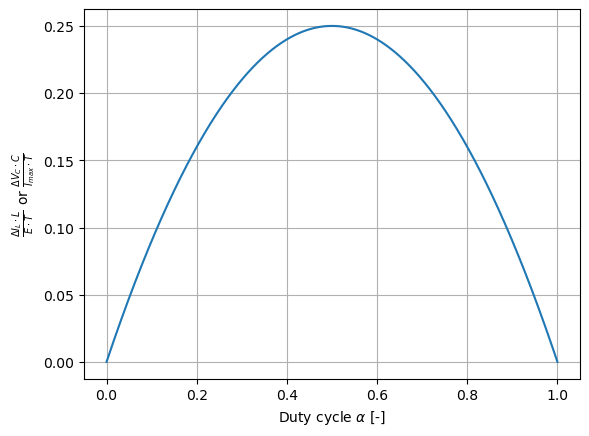

The critical duty cycle is : 0.50


In [2]:
import matplotlib.pyplot as plt
import numpy as np

alpha=np.linspace(0,1,1000)
ripple=alpha*(1-alpha)
plt.plot(alpha,ripple)  
plt.xlabel(r'Duty cycle $\alpha$ [-]')
plt.ylabel(r'$\frac{\Delta I_L \cdot L}{E \cdot T}$ or $\frac{\Delta V_C \cdot C}{I_{max} \cdot T}$')
plt.grid()
plt.show()

print('The critical duty cycle is : %.2f'%(alpha[np.argmax(ripple)]))

In [20]:
d_IL = 0.3*157
E = V_min
alpha = 0.5
T = 1/10000
L = E*(1-alpha)*alpha*T/d_IL
print('The inductance is at begining of charge : %.4f uH'%(L*1e6))

d_IL = 0.3*65*U_dc/V_max
E = V_max
L = E*(1-alpha)*alpha*T/d_IL
print('The inductance is at end of charge : %.4f uH'%(L*1e6))

The inductance is at begining of charge : 33.1741 uH
The inductance is at end of charge : 133.5470 uH


#### Components losses 

The following table summarizes the equations which enable to calculate losses in the main components of the converter.

|                    | Inductor | IGBT  | Diode | DC Capacitor |
| :----------------- | :------: | :---: | :---: | :----------: |
| Mean current       | $I_{L,moy}$    | $\alpha I_{L,moy}$ | $(1-\alpha)I_{L,moy}$ | 0 |
| RMS current        | $I_{L,RMS}$ | $\sqrt{\alpha } I_{L,RMS}$ |$\sqrt{1-\alpha } I_{L,RMS}$ | $\sqrt{\alpha \left(1-\alpha \right)} I_{L,RMS}$ |
| Conduction losses  | $R_{L}I_{RMS}^{2}$   | ${V_{0}}{I_{mean}}+R_{0}I_{RMS}^{2}$ |${V_{0}}{I_{mean}}+R_{0}I_{RMS}^{2}$ | $R_{S}I_{RMS}^{2}$ |
| Commutation losses |  0   | $f(E_{on}+E_{off})$ |$ f E_{switch}$ | 0 |

with : $I_{L,RMS}=\sqrt{\frac{1}{T}\int_{0}^{T} I_L^2 dt}=I_{L,moy}\sqrt{1+\frac{1}{12}\left(\frac{\Delta I_{L}}{I_{L,moy}}\right)^{2}}$

> Exercise 4: Explain how mean and RMS current are calculated for these components. Give modeling assumptions.


#### Components temperatures

Estimation of the hot spot temperature of the various components is important during the sizing of a converter. It is possible to use for this nodal approaches as Figure below.

*Nodal thermal model*
![ThermalModel](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/ThermalNetwork.png)

> Exercise 5: Give the equation to calculate the temperature of IGBT, Diode, inductor and capacitor based on the previous thermal scheme/assumption.
